In [2]:
import pandas as pd
df = pd.read_excel("C:/Users/DELL/PycharmProjects/PythonProject/Tennis/Iga_Cleaned.xlsx")

In [3]:
print(df.describe())
print(df.info())
print(df.nunique())  # Unique values per column

          Winners  Unforced Errors  Ratio:W/UFEs  WinnersPerPt   UFEsPerPt  \
count  320.000000       320.000000    320.000000    320.000000  320.000000   
mean    21.396875        22.506250      1.138437      0.175725    0.174731   
std      7.744469        11.035421      0.634774      0.057233    0.055184   
min      2.000000         3.000000      0.300000      0.022000    0.047000   
25%     16.000000        14.000000      0.700000      0.138000    0.136750   
50%     21.000000        20.000000      1.000000      0.169000    0.175000   
75%     26.000000        30.000000      1.300000      0.206250    0.210000   
max     49.000000        59.000000      4.300000      0.355000    0.360000   

       RallyWinnersExcludingAces  RallyUFEsExcludingDFs  RallyRatio  \
count                 320.000000             320.000000  320.000000   
mean                   19.506250              20.606250    1.139375   
std                     7.226733              10.245327    0.683032   
min          

<Figure size 1200x600 with 0 Axes>

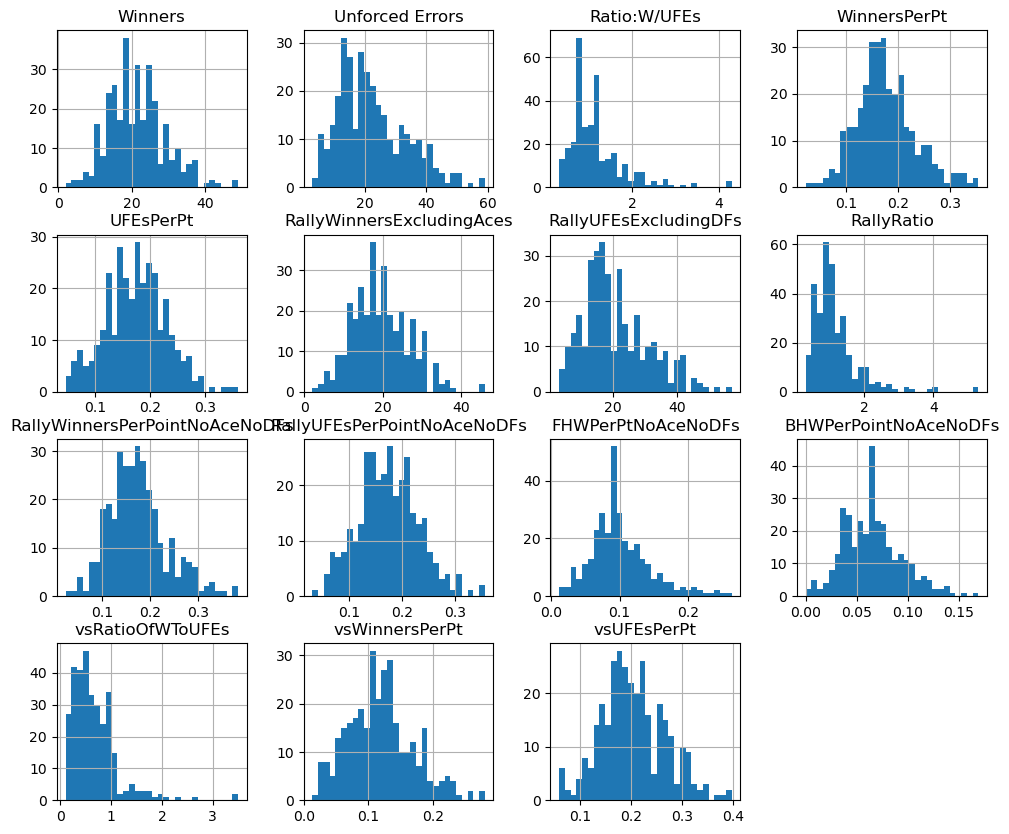

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.hist(figsize=(12, 10), bins=30)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10500\3995182523.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


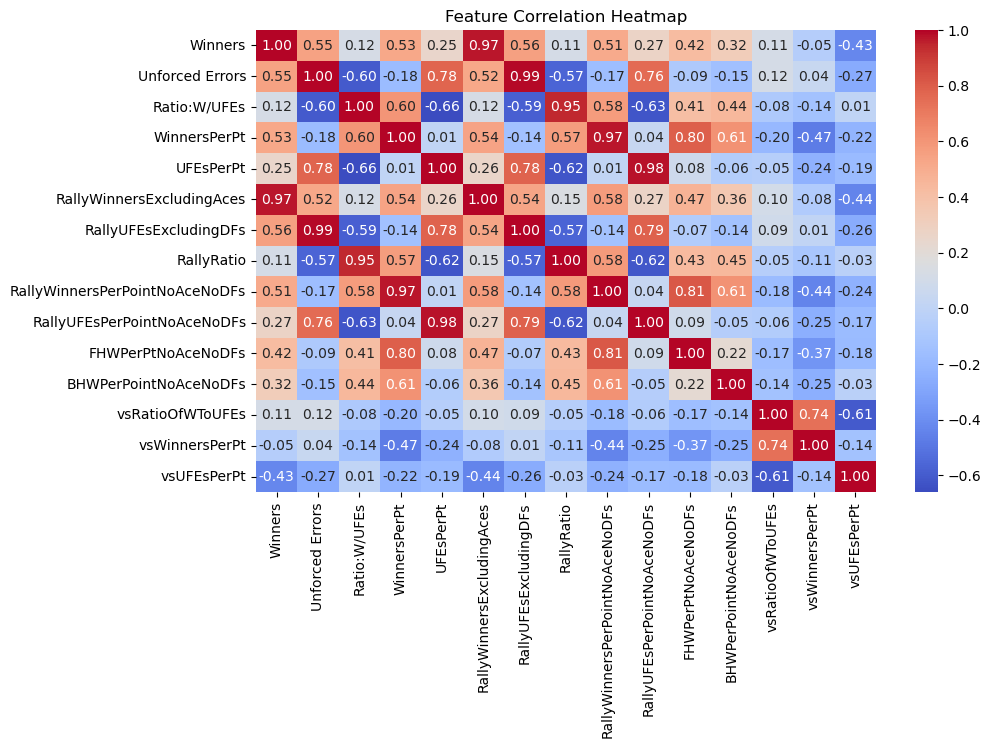

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

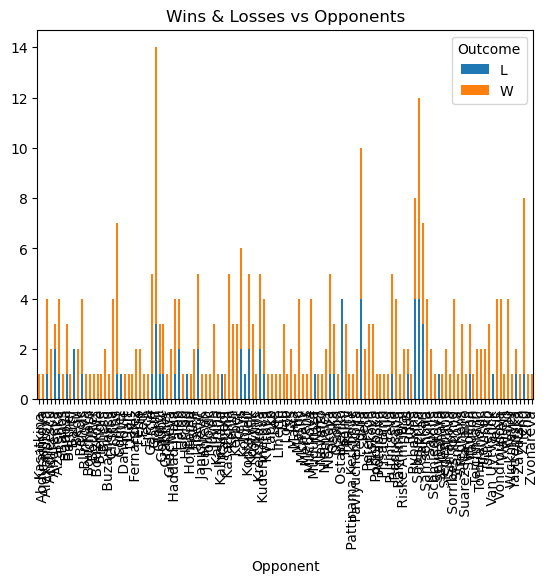

In [6]:
df.groupby("Opponent")["Outcome"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Wins & Losses vs Opponents")
plt.show()

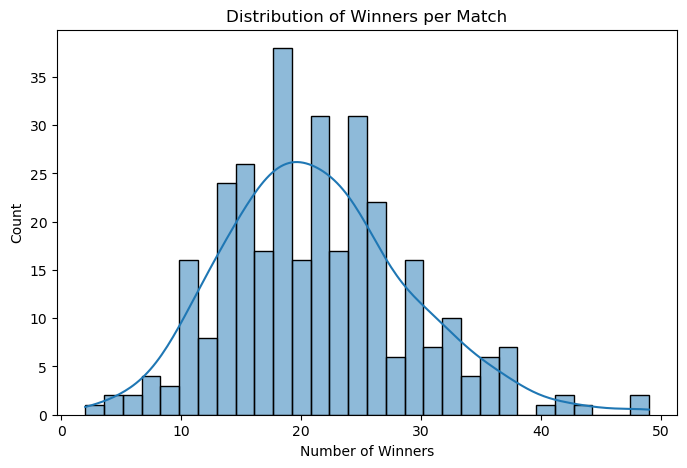

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Winners"], bins=30, kde=True)  # kde=True adds a smooth curve
plt.title("Distribution of Winners per Match")
plt.xlabel("Number of Winners")
plt.ylabel("Count")
plt.show()

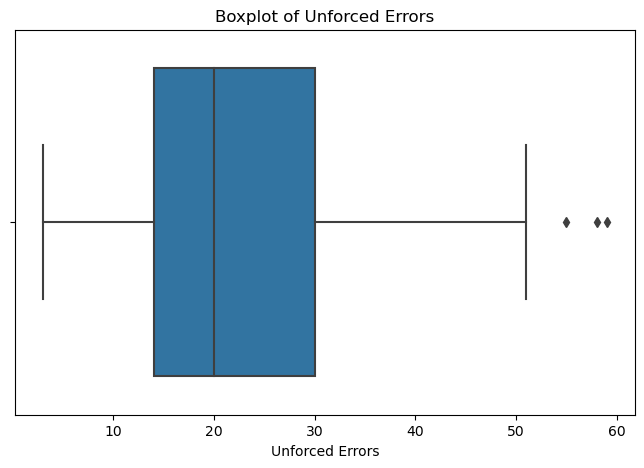

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Unforced Errors"])
plt.title("Boxplot of Unforced Errors")
plt.show()

In [13]:
import plotly.express as px
import pandas as pd

# Assuming you have your DataFrame 'df' already loaded

data = df.groupby("Opponent")["Outcome"].value_counts().unstack().reset_index()

#use the column names directly
fig = px.bar(data, x="Opponent", y=["L\xa0", "W\xa0"], title="Wins & Losses vs Opponents")
fig.show()

In [14]:
outlier_matches = df[df['Unforced Errors'] > 40]
print(len(outlier_matches))
print(outlier_matches)

26
                        Match  Winners  Unforced Errors  Ratio:W/UFEs  \
9     2025 Australian Open SF       20               41           0.5   
20            2024 BJK Cup SF       36               48           0.8   
22           2024 BJK Cup R16       36               45           0.8   
23      2024 Riyadh Finals RR       16               41           0.4   
26            2024 US Open QF       12               41           0.3   
30          2024 US Open R128       30               41           0.7   
69             2024 Miami R32       38               50           0.8   
103             2023 Tokyo QF       18               43           0.4   
109        2023 Cincinnati SF       27               45           0.6   
113          2023 Montreal SF       31               42           0.7   
122         2023 Wimbledon QF       37               41           0.9   
191          2022 Toronto R16       34               58           0.6   
202    2022 Roland Garros R16       30          

In [15]:
lost_matches = df[df['Outcome'] == 'L']
loss_counts = lost_matches['Opponent'].value_counts()
players_with_3plus_losses = loss_counts[loss_counts > 3]
print(players_with_3plus_losses)

Series([], Name: Opponent, dtype: int64)


In [20]:
lost_matches = df[df['Outcome'] == 'L\xa0']

In [21]:
loss_counts = lost_matches['Opponent'].value_counts()

In [22]:
players_with_3plus_losses = loss_counts[loss_counts >= 3]

In [23]:
print(players_with_3plus_losses)

 Pegula       4
 Sabalenka    4
 Ostapenko    4
 Rybakina     4
 Sakkari      3
 Gauff        3
Name: Opponent, dtype: int64


In [24]:
print(df['Outcome'].unique())  

['L\xa0' 'W\xa0']


In [26]:
noLoss = df[df['Outcome'] == 'W\xa0'] # Find all wins

won_opponents = noLoss['Opponent'].unique() # Get unique opponent names

print(won_opponents)

['\xa0Zheng' '\xa0Muchova' '\xa0Yastremska' '\xa0Garcia' '\xa0Rybakina'
 '\xa0Sakkari' '\xa0Navarro' '\xa0Lys' '\xa0Raducanu' '\xa0Sramkova'
 '\xa0Siniakova' '\xa0Boulter' '\xa0Helgo' '\xa0Paolini' '\xa0Noskova'
 '\xa0Badosa' 'Kasatkina' '\xa0Krejcikova' '\xa0Samsonova'
 '\xa0Pavlyuchenkova' '\xa0Shibahara' '\xa0Rakhimova' '\xa0Andreeva'
 '\xa0Kostyuk' '\xa0Gracheva' '\xa0Schmiedlova' '\xa0Collins' '\xa0Wang'
 '\xa0Parry' '\xa0Begu' '\xa0Martic' '\xa0Kenin' '\xa0Gauff'
 '\xa0Vondrousova' '\xa0Potapova' '\xa0Bouzkova' '\xa0Osaka'
 '\xa0Jeanjean' '\xa0Sabalenka' '\xa0Keys' '\xa0Kerber' '\xa0Putintseva'
 '\xa0Pera' '\xa0Haddad\xa0Maia' '\xa0Sorribes\xa0Tormo' '\xa0Cirstea'
 '\xa0Mertens' '\xa0Naef' '\xa0Waltert' '\xa0Giorgi' '\xa0Svitolina'
 '\xa0Stephens' '\xa0Azarenka' '\xa0Alexandrova' '\xa0Pegula' '\xa0Jabeur'
 '\xa0Linette' '\xa0Hontama' '\xa0Juvan' '\xa0Saville' '\xa0Peterson'
 '\xa0Pliskova' '\xa0Siegemund' '\xa0Wickmayer' '\xa0Liu'
 '\xa0Abduraimova' '\xa0Bencic' '\xa0Zhu' '\xa0Bl

In [27]:
noLoss = df[df['Outcome'] == 'W\xa0'] # Find all wins

won_opponents = noLoss['Opponent'].unique() # Get unique opponent names

print(won_opponents)

['\xa0Zheng' '\xa0Muchova' '\xa0Yastremska' '\xa0Garcia' '\xa0Rybakina'
 '\xa0Sakkari' '\xa0Navarro' '\xa0Lys' '\xa0Raducanu' '\xa0Sramkova'
 '\xa0Siniakova' '\xa0Boulter' '\xa0Helgo' '\xa0Paolini' '\xa0Noskova'
 '\xa0Badosa' 'Kasatkina' '\xa0Krejcikova' '\xa0Samsonova'
 '\xa0Pavlyuchenkova' '\xa0Shibahara' '\xa0Rakhimova' '\xa0Andreeva'
 '\xa0Kostyuk' '\xa0Gracheva' '\xa0Schmiedlova' '\xa0Collins' '\xa0Wang'
 '\xa0Parry' '\xa0Begu' '\xa0Martic' '\xa0Kenin' '\xa0Gauff'
 '\xa0Vondrousova' '\xa0Potapova' '\xa0Bouzkova' '\xa0Osaka'
 '\xa0Jeanjean' '\xa0Sabalenka' '\xa0Keys' '\xa0Kerber' '\xa0Putintseva'
 '\xa0Pera' '\xa0Haddad\xa0Maia' '\xa0Sorribes\xa0Tormo' '\xa0Cirstea'
 '\xa0Mertens' '\xa0Naef' '\xa0Waltert' '\xa0Giorgi' '\xa0Svitolina'
 '\xa0Stephens' '\xa0Azarenka' '\xa0Alexandrova' '\xa0Pegula' '\xa0Jabeur'
 '\xa0Linette' '\xa0Hontama' '\xa0Juvan' '\xa0Saville' '\xa0Peterson'
 '\xa0Pliskova' '\xa0Siegemund' '\xa0Wickmayer' '\xa0Liu'
 '\xa0Abduraimova' '\xa0Bencic' '\xa0Zhu' '\xa0Bl

In [28]:
print(df['Opponent'].unique()) 

['\xa0Andreeva' '\xa0Zheng' '\xa0Muchova' '\xa0Yastremska' '\xa0Garcia'
 '\xa0Ostapenko' '\xa0Rybakina' '\xa0Sakkari' '\xa0Keys' '\xa0Navarro'
 '\xa0Lys' '\xa0Raducanu' '\xa0Sramkova' '\xa0Siniakova' '\xa0Gauff'
 '\xa0Boulter' '\xa0Helgo' '\xa0Paolini' '\xa0Noskova' '\xa0Badosa'
 'Kasatkina' '\xa0Krejcikova' '\xa0Pegula' '\xa0Samsonova'
 '\xa0Pavlyuchenkova' '\xa0Shibahara' '\xa0Rakhimova' '\xa0Sabalenka'
 '\xa0Kostyuk' '\xa0Gracheva' '\xa0Schmiedlova' '\xa0Collins' '\xa0Wang'
 '\xa0Parry' '\xa0Begu' '\xa0Putintseva' '\xa0Martic' '\xa0Kenin'
 '\xa0Vondrousova' '\xa0Potapova' '\xa0Bouzkova' '\xa0Osaka'
 '\xa0Jeanjean' '\xa0Kerber' '\xa0Pera' '\xa0Haddad\xa0Maia'
 '\xa0Sorribes\xa0Tormo' '\xa0Cirstea' '\xa0Mertens' '\xa0Naef'
 '\xa0Waltert' '\xa0Alexandrova' '\xa0Giorgi' '\xa0Kalinskaya'
 '\xa0Svitolina' '\xa0Stephens' '\xa0Azarenka' '\xa0Jabeur' '\xa0Linette'
 '\xa0Kudermetova' '\xa0Hontama' '\xa0Juvan' '\xa0Saville' '\xa0Peterson'
 '\xa0Pliskova' '\xa0Siegemund' '\xa0Wickmayer' '\xa0Li

In [29]:
df['Opponent'] = df['Opponent'].str.replace('\xa0', '')
df['Outcome'] = df['Outcome'].str.replace('\xa0', '')

# Now, your columns should be clean
print(df['Opponent'].unique())
print(df['Outcome'].unique())

# Example after cleaning.
noLoss = df[df['Outcome'] == 'w'] #notice the change here.
won_opponents = noLoss['Opponent'].unique()
print(won_opponents)

['Andreeva' 'Zheng' 'Muchova' 'Yastremska' 'Garcia' 'Ostapenko' 'Rybakina'
 'Sakkari' 'Keys' 'Navarro' 'Lys' 'Raducanu' 'Sramkova' 'Siniakova'
 'Gauff' 'Boulter' 'Helgo' 'Paolini' 'Noskova' 'Badosa' 'Kasatkina'
 'Krejcikova' 'Pegula' 'Samsonova' 'Pavlyuchenkova' 'Shibahara'
 'Rakhimova' 'Sabalenka' 'Kostyuk' 'Gracheva' 'Schmiedlova' 'Collins'
 'Wang' 'Parry' 'Begu' 'Putintseva' 'Martic' 'Kenin' 'Vondrousova'
 'Potapova' 'Bouzkova' 'Osaka' 'Jeanjean' 'Kerber' 'Pera' 'HaddadMaia'
 'SorribesTormo' 'Cirstea' 'Mertens' 'Naef' 'Waltert' 'Alexandrova'
 'Giorgi' 'Kalinskaya' 'Svitolina' 'Stephens' 'Azarenka' 'Jabeur'
 'Linette' 'Kudermetova' 'Hontama' 'Juvan' 'Saville' 'Peterson' 'Pliskova'
 'Siegemund' 'Wickmayer' 'Liu' 'Abduraimova' 'Bencic' 'Zhu' 'Blinkova'
 'Teichmann' 'Maria' 'Tsurenko' 'Bucsa' 'Vekic' 'Grabher' 'Andreescu'
 'Fernandez' 'Osorio' 'Niemeier' 'Trevisan' 'Mcnally' 'Tomljanovic'
 'Davis' 'Lee' 'Frech' 'Cornet' 'PattinamaKerkhove' 'Fett' 'Kovinic'
 'RiskeAmritraj' 'Ruse' 'Prisa

In [30]:

wins = df[df['Outcome'] == 'w']
print(wins)
all_opponents = df['Opponent'].unique() #All unique opponents

lost_opponents = [opponent for opponent in all_opponents if opponent not in wins] #opponents not in wins.

print(lost_opponents)

Empty DataFrame
Columns: [Match, Winners, Unforced Errors, Ratio:W/UFEs, WinnersPerPt, UFEsPerPt, RallyWinnersExcludingAces, RallyUFEsExcludingDFs, RallyRatio, RallyWinnersPerPointNoAceNoDFs, RallyUFEsPerPointNoAceNoDFs, FHWPerPtNoAceNoDFs, BHWPerPointNoAceNoDFs, vsRatioOfWToUFEs, vsWinnersPerPt, vsUFEsPerPt, Outcome, Opponent]
Index: []
['Andreeva', 'Zheng', 'Muchova', 'Yastremska', 'Garcia', 'Ostapenko', 'Rybakina', 'Sakkari', 'Keys', 'Navarro', 'Lys', 'Raducanu', 'Sramkova', 'Siniakova', 'Gauff', 'Boulter', 'Helgo', 'Paolini', 'Noskova', 'Badosa', 'Kasatkina', 'Krejcikova', 'Pegula', 'Samsonova', 'Pavlyuchenkova', 'Shibahara', 'Rakhimova', 'Sabalenka', 'Kostyuk', 'Gracheva', 'Schmiedlova', 'Collins', 'Wang', 'Parry', 'Begu', 'Putintseva', 'Martic', 'Kenin', 'Vondrousova', 'Potapova', 'Bouzkova', 'Osaka', 'Jeanjean', 'Kerber', 'Pera', 'HaddadMaia', 'SorribesTormo', 'Cirstea', 'Mertens', 'Naef', 'Waltert', 'Alexandrova', 'Giorgi', 'Kalinskaya', 'Svitolina', 'Stephens', 'Azarenka', 'Ja

In [31]:
print(df['Outcome'].head(20)) #

0     L
1     W
2     W
3     W
4     W
5     L
6     L
7     W
8     W
9     L
10    W
11    W
12    W
13    W
14    W
15    L
16    W
17    W
18    W
19    W
Name: Outcome, dtype: object


In [32]:
lost_against = df[df['Outcome'] == 'L']['Opponent'].unique()
print(lost_against)
all_opponents = df['Opponent'].unique() #All unique opponents

lost_opponents = [opponent for opponent in all_opponents if opponent not in wins] #opponents not in wins.

print(lost_opponents)

['Andreeva' 'Ostapenko' 'Keys' 'Gauff' 'Pegula' 'Sabalenka' 'Zheng'
 'Putintseva' 'Rybakina' 'Alexandrova' 'Kalinskaya' 'Noskova'
 'Kudermetova' 'Svitolina' 'Krejcikova' 'HaddadMaia' 'Garcia' 'Cornet'
 'Collins' 'Barty' 'Sakkari' 'Bencic' 'Jabeur' 'Badosa' 'Konjuh'
 'Muguruza' 'Halep' 'Rus' 'Azarenka' 'Kontaveit' 'Sevastova' 'Osaka'
 'Golubic' 'Hercog' 'VanUytvanck' 'Yastremska' 'Giorgi']
['Andreeva', 'Zheng', 'Muchova', 'Yastremska', 'Garcia', 'Ostapenko', 'Rybakina', 'Sakkari', 'Keys', 'Navarro', 'Lys', 'Raducanu', 'Sramkova', 'Siniakova', 'Gauff', 'Boulter', 'Helgo', 'Paolini', 'Noskova', 'Badosa', 'Kasatkina', 'Krejcikova', 'Pegula', 'Samsonova', 'Pavlyuchenkova', 'Shibahara', 'Rakhimova', 'Sabalenka', 'Kostyuk', 'Gracheva', 'Schmiedlova', 'Collins', 'Wang', 'Parry', 'Begu', 'Putintseva', 'Martic', 'Kenin', 'Vondrousova', 'Potapova', 'Bouzkova', 'Osaka', 'Jeanjean', 'Kerber', 'Pera', 'HaddadMaia', 'SorribesTormo', 'Cirstea', 'Mertens', 'Naef', 'Waltert', 'Alexandrova', 'Giorgi', 'K

In [33]:
print(wins)

Empty DataFrame
Columns: [Match, Winners, Unforced Errors, Ratio:W/UFEs, WinnersPerPt, UFEsPerPt, RallyWinnersExcludingAces, RallyUFEsExcludingDFs, RallyRatio, RallyWinnersPerPointNoAceNoDFs, RallyUFEsPerPointNoAceNoDFs, FHWPerPtNoAceNoDFs, BHWPerPointNoAceNoDFs, vsRatioOfWToUFEs, vsWinnersPerPt, vsUFEsPerPt, Outcome, Opponent]
Index: []


In [34]:
lost_against = df[df['Outcome'] == 'L']['Opponent'].unique()
won_against = df[df['Outcome'] == 'W']['Opponent'].unique()

never_lost_against = [opponent for opponent in won_against if opponent not in lost_against]

print(never_lost_against)

['Muchova', 'Navarro', 'Lys', 'Raducanu', 'Sramkova', 'Siniakova', 'Boulter', 'Helgo', 'Paolini', 'Kasatkina', 'Samsonova', 'Pavlyuchenkova', 'Shibahara', 'Rakhimova', 'Kostyuk', 'Gracheva', 'Schmiedlova', 'Wang', 'Parry', 'Begu', 'Martic', 'Kenin', 'Vondrousova', 'Potapova', 'Bouzkova', 'Jeanjean', 'Kerber', 'Pera', 'SorribesTormo', 'Cirstea', 'Mertens', 'Naef', 'Waltert', 'Stephens', 'Linette', 'Hontama', 'Juvan', 'Saville', 'Peterson', 'Pliskova', 'Siegemund', 'Wickmayer', 'Liu', 'Abduraimova', 'Zhu', 'Blinkova', 'Teichmann', 'Maria', 'Tsurenko', 'Bucsa', 'Vekic', 'Grabher', 'Andreescu', 'Fernandez', 'Osorio', 'Niemeier', 'Trevisan', 'Mcnally', 'Tomljanovic', 'Davis', 'Lee', 'Frech', 'PattinamaKerkhove', 'Fett', 'Kovinic', 'RiskeAmritraj', 'Ruse', 'Prisacariu', 'Buzarnescu', 'Kvitova', 'Brengle', 'Tauson', 'Kalinina', 'Kanepi', 'Dart', 'Ferro', 'Loeb', 'Zvonareva', 'Hsieh', 'Podoroska', 'Bouchard', 'SuarezNavarro', 'Babos', 'Jorovic', 'Puig', 'Janicijevic', 'Lapko', 'Danilovic', 'Za

In [35]:
#winloss ratio against an opponent
opponent_win_loss = df.groupby('Opponent')['Outcome'].value_counts().unstack(fill_value=0)
print("Win/Loss Record Against Opponents:\n", opponent_win_loss)

Win/Loss Record Against Opponents:
 Outcome      L  W
Opponent         
Abduraimova  0  1
Alexandrova  1  3
Andreescu    0  2
Andreeva     2  1
Azarenka     1  3
...         .. ..
Yastremska   1  1
Zavatska     0  1
Zheng        1  7
Zhu          0  1
Zvonareva    0  1

[127 rows x 2 columns]


In [36]:
#overall win loss record
win_loss_counts = df['Outcome'].value_counts()
print("Win/Loss Counts:\n", win_loss_counts)

win_percentage = (df['Outcome'] == 'W').mean() * 100
print(f"Win Percentage: {win_percentage:.2f}%")

Win/Loss Counts:
 W    260
L     60
Name: Outcome, dtype: int64
Win Percentage: 81.25%


In [37]:
#What is the player's average number of winners and unforced errors?
avg_winners = df['Winners'].mean()
avg_unforced_errors = df['Unforced Errors'].mean()
print(f"Average Winners: {avg_winners:.2f}")
print(f"Average Unforced Errors: {avg_unforced_errors:.2f}")

Average Winners: 21.40
Average Unforced Errors: 22.51


In [38]:
#What is the player's average ratio of winners to unforced errors?
avg_ratio = df['Ratio:W/UFEs'].mean()
print(f"Average Winners/Unforced Errors Ratio: {avg_ratio:.2f}")

Average Winners/Unforced Errors Ratio: 1.14


In [39]:
#What is the player's average number of winners and unforced errors per point?
avg_winners_per_pt = df['WinnersPerPt'].mean()
avg_ufes_per_pt = df['UFEsPerPt'].mean()
print(f"Average Winners Per Point: {avg_winners_per_pt:.4f}")
print(f"Average Unforced Errors Per Point: {avg_ufes_per_pt:.4f}")

Average Winners Per Point: 0.1757
Average Unforced Errors Per Point: 0.1747


In [40]:
#How does the player perform in rally situations (excluding aces and double faults)?
avg_rally_ratio = df['RallyRatio'].mean()
avg_rally_winners_per_point = df['RallyWinnersPerPointNoAceNoDFs'].mean()
avg_rally_ufes_per_point = df['RallyUFEsPerPointNoAceNoDFs'].mean()

print(f"Average Rally Ratio: {avg_rally_ratio:.2f}")
print(f"Average Rally Winners Per Point: {avg_rally_winners_per_point:.4f}")
print(f"Average Rally Unforced Errors Per Point: {avg_rally_ufes_per_point:.4f}")

Average Rally Ratio: 1.14
Average Rally Winners Per Point: 0.1740
Average Rally Unforced Errors Per Point: 0.1739


In [41]:
#How does the player's forehand and backhand winners per point compare?
avg_forehand_winners_per_point = df['FHWPerPtNoAceNoDFs'].mean()
avg_backhand_winners_per_point = df['BHWPerPointNoAceNoDFs'].mean()

print(f"Average Forehand Winners Per Point: {avg_forehand_winners_per_point:.4f}")
print(f"Average Backhand Winners Per Point: {avg_backhand_winners_per_point:.4f}")

Average Forehand Winners Per Point: 0.1015
Average Backhand Winners Per Point: 0.0652


In [42]:
#What is the player's win/loss record against each opponent
opponent_win_loss = df.groupby('Opponent')['Outcome'].value_counts().unstack(fill_value=0)
print("Win/Loss Record Against Opponents:\n", opponent_win_loss)

Win/Loss Record Against Opponents:
 Outcome      L  W
Opponent         
Abduraimova  0  1
Alexandrova  1  3
Andreescu    0  2
Andreeva     2  1
Azarenka     1  3
...         .. ..
Yastremska   1  1
Zavatska     0  1
Zheng        1  7
Zhu          0  1
Zvonareva    0  1

[127 rows x 2 columns]


In [43]:
#Which opponents have the highest/lowest average ratio of winners to unforced errors against the player?
opponent_avg_ratio = df.groupby('Opponent')['vsRatioOfWToUFEs'].mean().sort_values(ascending=False)
print("Average Ratio Against Opponents:\n", opponent_avg_ratio)

Average Ratio Against Opponents:
 Opponent
Cornet        2.300
Hercog        1.600
Bouzkova      1.500
Halep         1.425
Konjuh        1.400
              ...  
Peterson      0.200
Sramkova      0.100
Buzarnescu    0.100
Ruse          0.100
Prisacariu    0.100
Name: vsRatioOfWToUFEs, Length: 127, dtype: float64


In [44]:
#Against which opponents does the player have the highest/lowest winners per point?
opponent_avg_winners_per_pt = df.groupby('Opponent')['vsWinnersPerPt'].mean().sort_values(ascending=False)
print("Average Winners Per Point Against Opponents:\n", opponent_avg_winners_per_pt)

Average Winners Per Point Against Opponents:
 Opponent
Konjuh         0.213000
Ostapenko      0.209750
Andreeva       0.192667
Alexandrova    0.189250
Lapko          0.184000
                 ...   
Tsurenko       0.030667
Lee            0.030000
Prisacariu     0.027000
Jeanjean       0.025000
Buzarnescu     0.013000
Name: vsWinnersPerPt, Length: 127, dtype: float64


In [45]:
#Which matches had the highest/lowest ratio of winners to unforced errors?
highest_ratio_match = df.loc[df['Ratio:W/UFEs'].idxmax()]
lowest_ratio_match = df.loc[df['Ratio:W/UFEs'].idxmin()]
print("Match with Highest Ratio:\n", highest_ratio_match)
print("\nMatch with Lowest Ratio:\n", lowest_ratio_match)

Match with Highest Ratio:
 Match                             2024 Roland Garros R16
Winners                                               13
Unforced Errors                                        3
Ratio:W/UFEs                                         4.3
WinnersPerPt                                       0.224
UFEsPerPt                                          0.052
RallyWinnersExcludingAces                             10
RallyUFEsExcludingDFs                                  3
RallyRatio                                           3.3
RallyWinnersPerPointNoAceNoDFs                     0.185
RallyUFEsPerPointNoAceNoDFs                        0.056
FHWPerPtNoAceNoDFs                                 0.093
BHWPerPointNoAceNoDFs                              0.093
vsRatioOfWToUFEs                                     0.3
vsWinnersPerPt                                     0.086
vsUFEsPerPt                                        0.259
Outcome                                                W
Oppo

In [46]:
#Which matches had the highest/lowest number of unforced errors?
highest_ufe_match = df.loc[df['Unforced Errors'].idxmax()]
lowest_ufe_match = df.loc[df['Unforced Errors'].idxmin()]
print("Match with Highest Unforced Errors:\n", highest_ufe_match)
print("\nMatch with Lowest Unforced Errors:\n", lowest_ufe_match)

Match with Highest Unforced Errors:
 Match                             2021 Rome R16
Winners                                      49
Unforced Errors                              59
Ratio:W/UFEs                                0.8
WinnersPerPt                              0.211
UFEsPerPt                                 0.254
RallyWinnersExcludingAces                    46
RallyUFEsExcludingDFs                        57
RallyRatio                                  0.8
RallyWinnersPerPointNoAceNoDFs            0.213
RallyUFEsPerPointNoAceNoDFs               0.264
FHWPerPtNoAceNoDFs                        0.111
BHWPerPointNoAceNoDFs                     0.097
vsRatioOfWToUFEs                            0.7
vsWinnersPerPt                            0.116
vsUFEsPerPt                               0.177
Outcome                                       W
Opponent                             Krejcikova
Name: 273, dtype: object

Match with Lowest Unforced Errors:
 Match                             202

In [47]:
#forehand backhand comparison
import scipy.stats as stats

# Assuming 'df' is your DataFrame

# Calculate average winners per point
avg_forehand_winners = df['FHWPerPtNoAceNoDFs'].mean()
avg_backhand_winners = df['BHWPerPointNoAceNoDFs'].mean()

# Compare averages
print(f"Average Forehand Winners Per Point: {avg_forehand_winners:.4f}")
print(f"Average Backhand Winners Per Point: {avg_backhand_winners:.4f}")

if avg_forehand_winners > avg_backhand_winners:
    print("Forehand is stronger (higher average winners per point).")
elif avg_backhand_winners > avg_forehand_winners:
    print("Backhand is stronger (higher average winners per point).")
else:
    print("Forehand and backhand winners per point are equal.")

# Statistical Test (Optional)
t_stat, p_value = stats.ttest_ind(df['FHWPerPtNoAceNoDFs'], df['BHWPerPointNoAceNoDFs'], equal_var=False) #Welch's t-test for unequal variances.
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in forehand and backhand winners per point is statistically significant.")
else:
    print("The difference in forehand and backhand winners per point is not statistically significant.")

Average Forehand Winners Per Point: 0.1015
Average Backhand Winners Per Point: 0.0652
Forehand is stronger (higher average winners per point).
T-statistic: 12.5562
P-value: 0.0000
The difference in forehand and backhand winners per point is statistically significant.


Average Unforced Errors Per Opponent:
 Opponent
Sevastova    55.0
Danilovic    49.0
Kanepi       48.0
Hercog       47.0
Kalinina     43.0
             ... 
Fernandez     9.0
Kvitova       9.0
Jorovic       7.0
Shibahara     6.0
Potapova      3.0
Name: Unforced Errors, Length: 127, dtype: float64


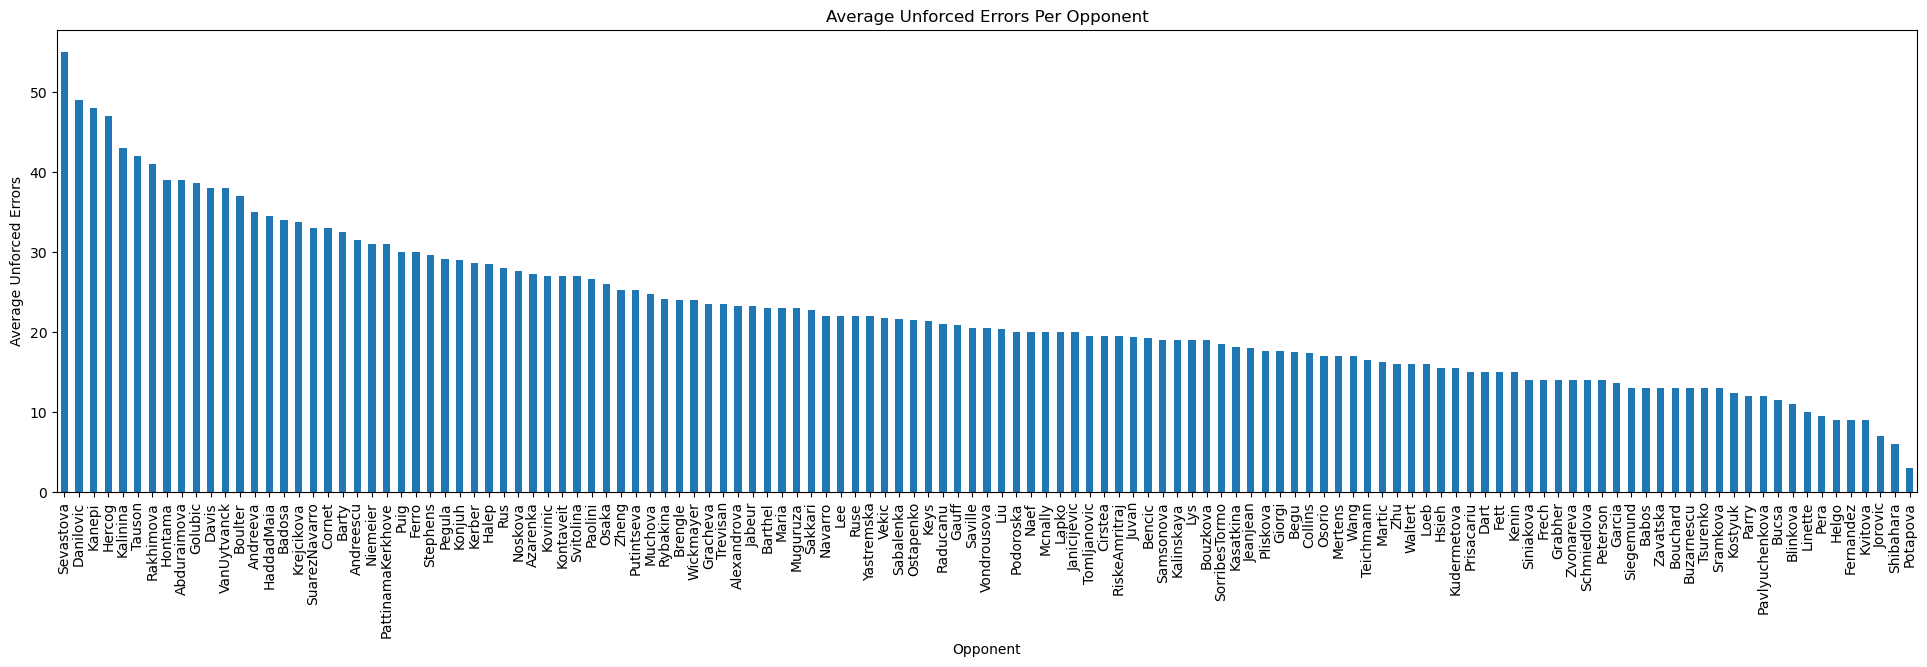

F-statistic: 1.3139
P-value: 0.0438
The difference in unforced errors between opponents is statistically significant.


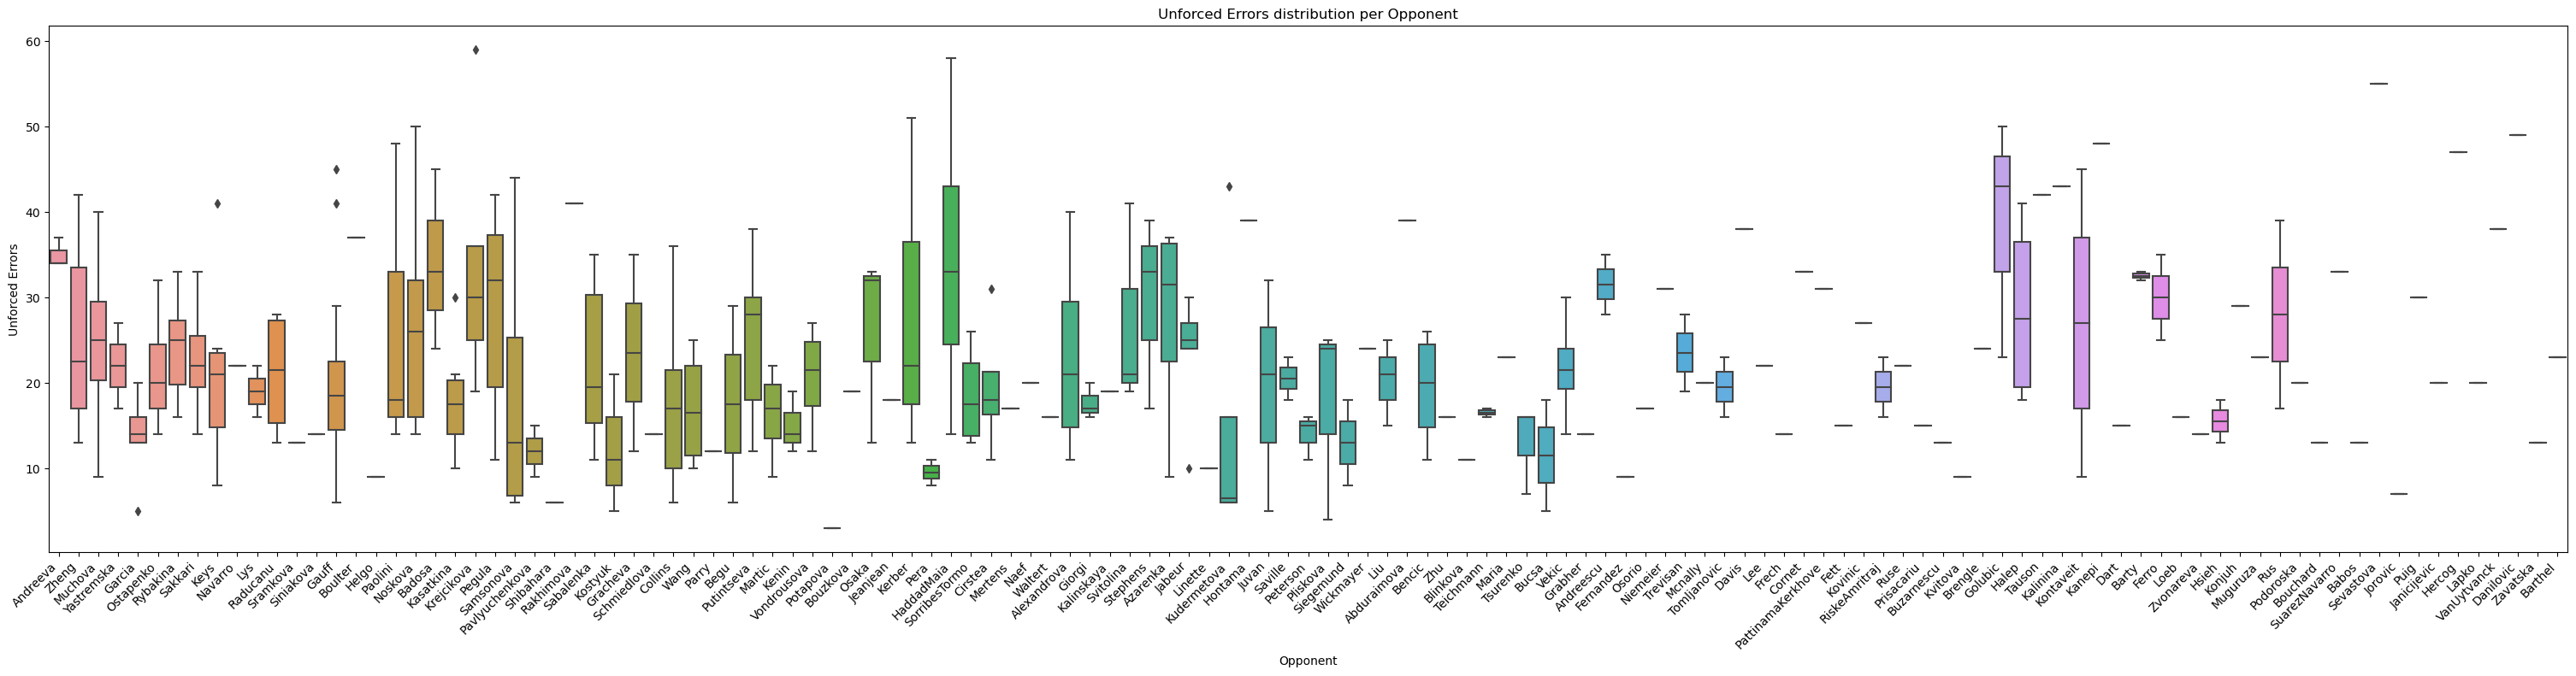

In [48]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# 1. Calculate Average Unforced Errors Per Opponent
avg_ufes_per_opponent = df.groupby('Opponent')['Unforced Errors'].mean().sort_values(ascending=False)
print("Average Unforced Errors Per Opponent:\n", avg_ufes_per_opponent)

# 2. Compare Averages (Visual Inspection)
plt.figure(figsize=(24, 6))
avg_ufes_per_opponent.plot(kind='bar')
plt.title('Average Unforced Errors Per Opponent')
plt.xlabel('Opponent')
plt.ylabel('Average Unforced Errors')
plt.show()

# 3. Statistical Testing (ANOVA)
grouped_data = [df['Unforced Errors'][df['Opponent'] == opponent] for opponent in df['Opponent'].unique()]

f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in unforced errors between opponents is statistically significant.")
else:
    print("The difference in unforced errors between opponents is not statistically significant.")

#4. Boxplot for better visual representation of distribution
plt.figure(figsize=(38, 8))
sns.boxplot(x='Opponent', y='Unforced Errors', data=df)
plt.title('Unforced Errors distribution per Opponent')
plt.xticks(rotation=45, ha='right')
plt.show()

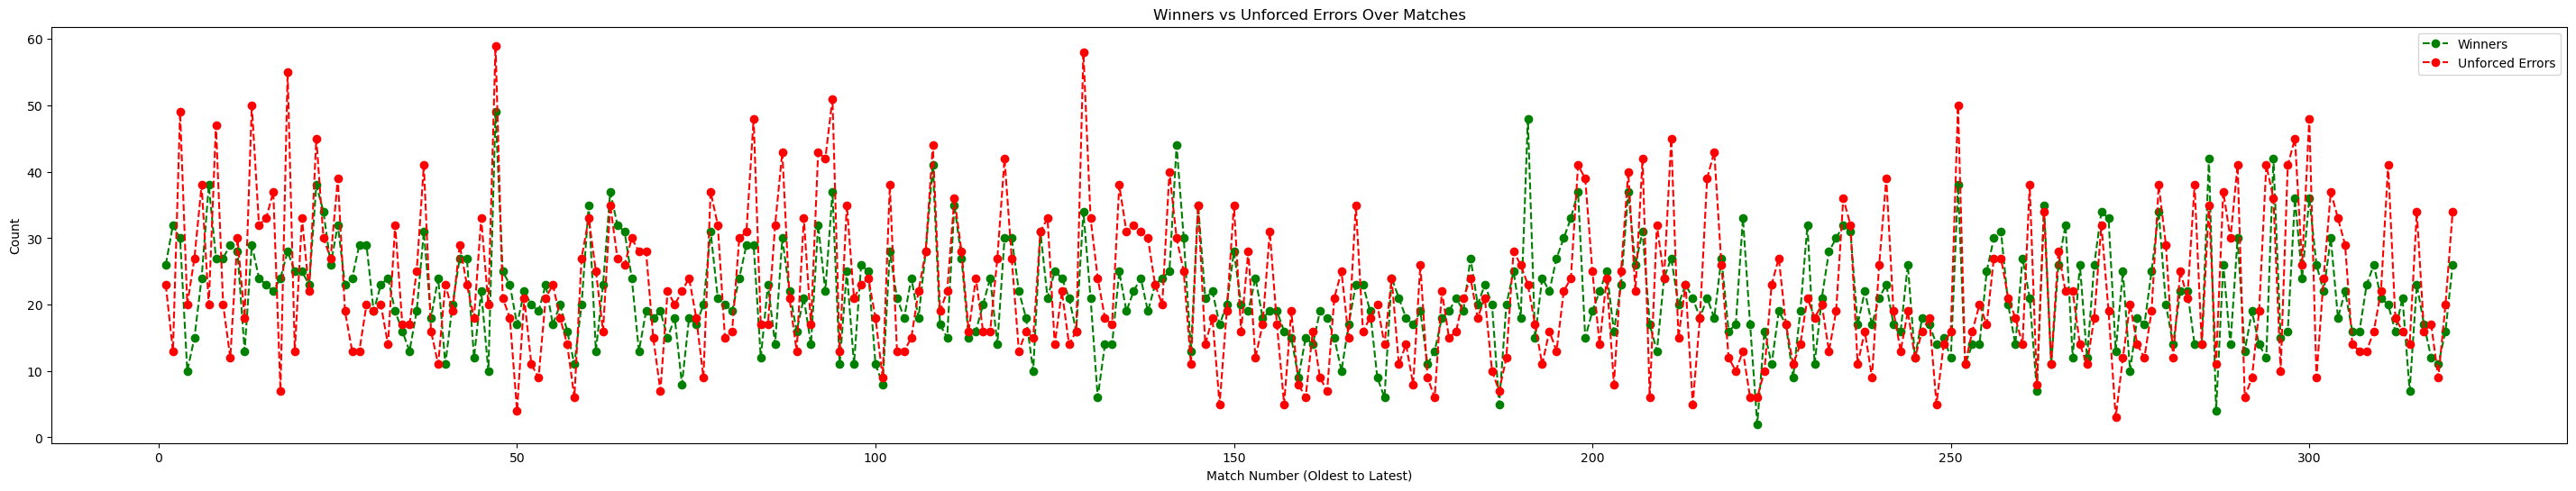

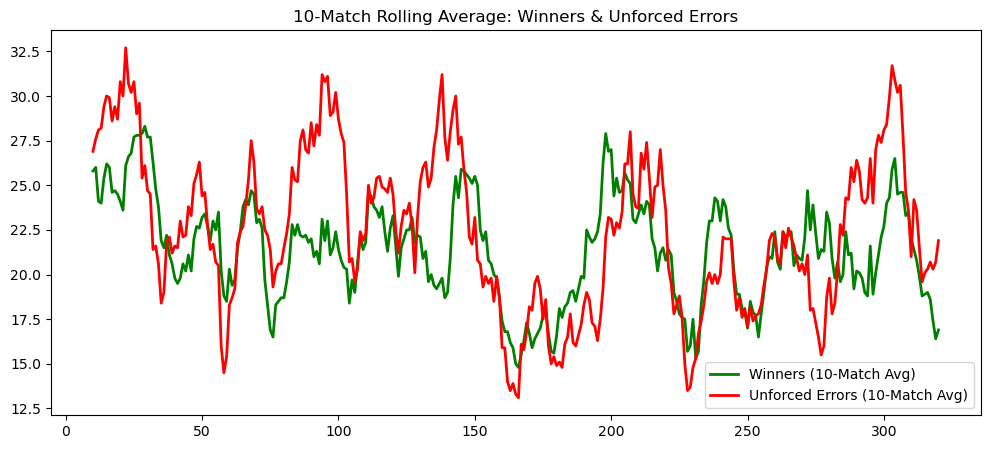

In [51]:
df = df.iloc[::-1].reset_index(drop=True)  # Reverse DataFrame and reset index
df['Match Number'] = range(1, len(df) + 1)  # Assign new chronological match numbers
import matplotlib.pyplot as plt

plt.figure(figsize=(36, 6))
plt.plot(df['Match Number'], df['Winners'], label='Winners', color='green', marker='o', linestyle='dashed')
plt.plot(df['Match Number'], df['Unforced Errors'], label='Unforced Errors', color='red', marker='o', linestyle='dashed')
plt.xlabel("Match Number (Oldest to Latest)")
plt.ylabel("Count")
plt.title("Winners vs Unforced Errors Over Matches")
plt.legend()
plt.show()
df['Rolling_Winners'] = df['Winners'].rolling(window=10).mean()
df['Rolling_UFEs'] = df['Unforced Errors'].rolling(window=10).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['Match Number'], df['Rolling_Winners'], label='Winners (10-Match Avg)', color='green', linewidth=2)
plt.plot(df['Match Number'], df['Rolling_UFEs'], label='Unforced Errors (10-Match Avg)', color='red', linewidth=2)
plt.title("10-Match Rolling Average: Winners & Unforced Errors")
plt.legend()
plt.show()


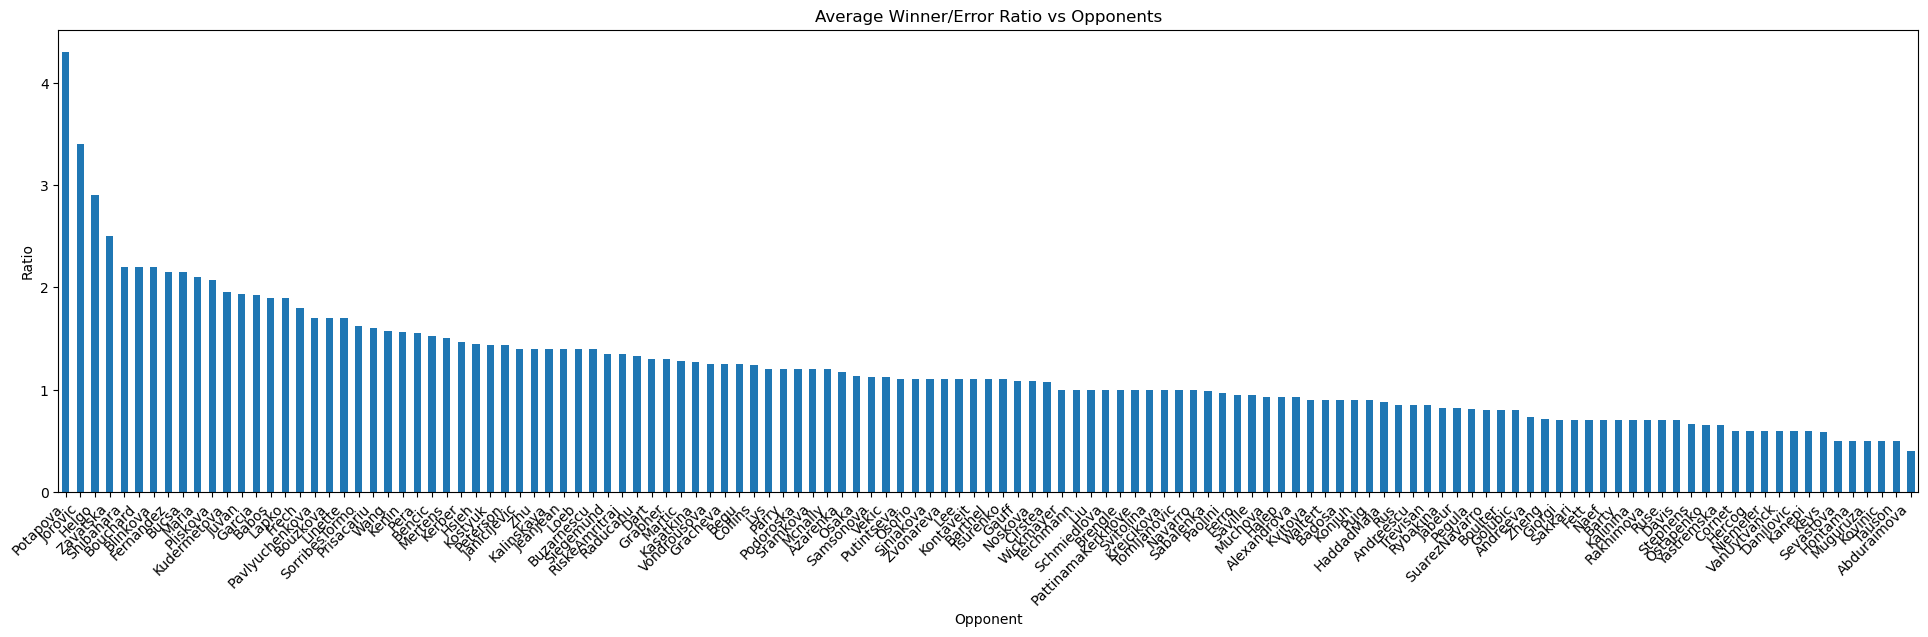

In [54]:
#Winners/Error ratio per opponent
opponent_ratio = df.groupby('Opponent')['Ratio:W/UFEs'].mean().sort_values(ascending=False)

plt.figure(figsize=(24, 6))
opponent_ratio.plot(kind='bar')
plt.title("Average Winner/Error Ratio vs Opponents")
plt.ylabel("Ratio")
plt.xlabel("Opponent")
plt.xticks(rotation=45, ha='right')
plt.show()

In [59]:
import plotly.express as px

# Assuming opponent_result is already calculated

fig = px.imshow(opponent_result,
                labels=dict(x="Outcome", y="Opponent", color="Count"),
                x=opponent_result.columns,
                y=opponent_result.index,
                title="Win/Loss Heatmap vs Opponents")
fig.show()

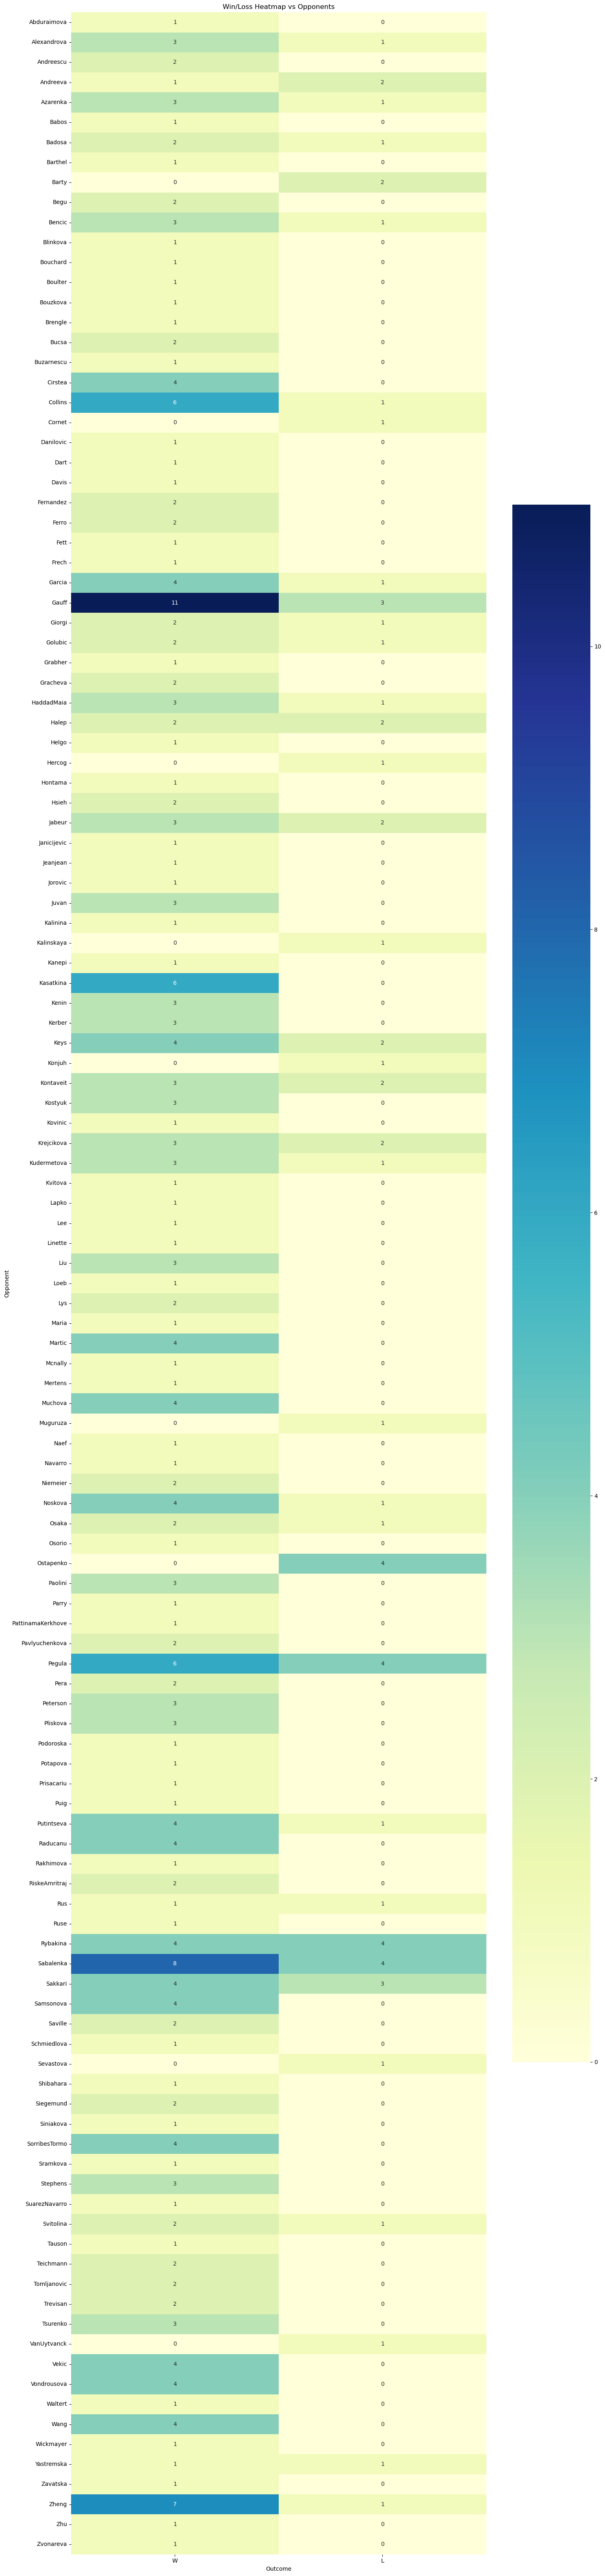

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrame 'df' already loaded

# Count Wins/Losses per Opponent
opponent_result = df.groupby('Opponent')['Outcome'].value_counts().unstack(fill_value=0)

# Ensure both "Win" and "Loss" are included for all opponents
opponent_result = opponent_result.reindex(columns=['W', 'L'], fill_value=0)

# Adjust figure size and rotate y-axis labels
plt.figure(figsize=(15, len(opponent_result) * 0.5))  # Adjust figsize as needed
sns.heatmap(opponent_result, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Win/Loss Heatmap vs Opponents")
plt.xlabel("Outcome")
plt.ylabel("Opponent")
plt.yticks(rotation=0)  # Rotate y-axis labels
plt.tight_layout() #prevents labels from being cut off
plt.show()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df['Outcome_Binary'] = df['Outcome'].map({'W': 1, 'L': 0})

features = ['Winners', 'Unforced Errors', 'Ratio:W/UFEs', 'WinnersPerPt', 'UFEsPerPt']
X = df[features]
y = df['Outcome_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(y) 

              precision    recall  f1-score   support

           0       0.29      0.22      0.25         9
           1       0.88      0.91      0.89        55

    accuracy                           0.81        64
   macro avg       0.58      0.57      0.57        64
weighted avg       0.79      0.81      0.80        64

0      1
1      1
2      1
3      0
4      0
      ..
315    1
316    1
317    1
318    1
319    0
Name: Outcome_Binary, Length: 320, dtype: int64


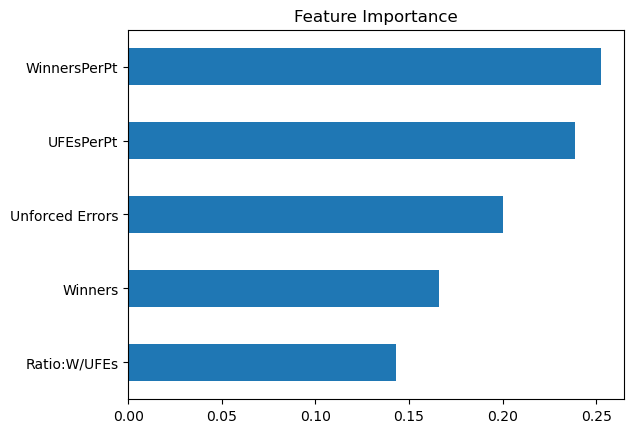

In [63]:
importances = pd.Series(model.feature_importances_, index=features).sort_values()
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X_cluster = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['PlayStyleCluster'] = kmeans.fit_predict(X_scaled)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



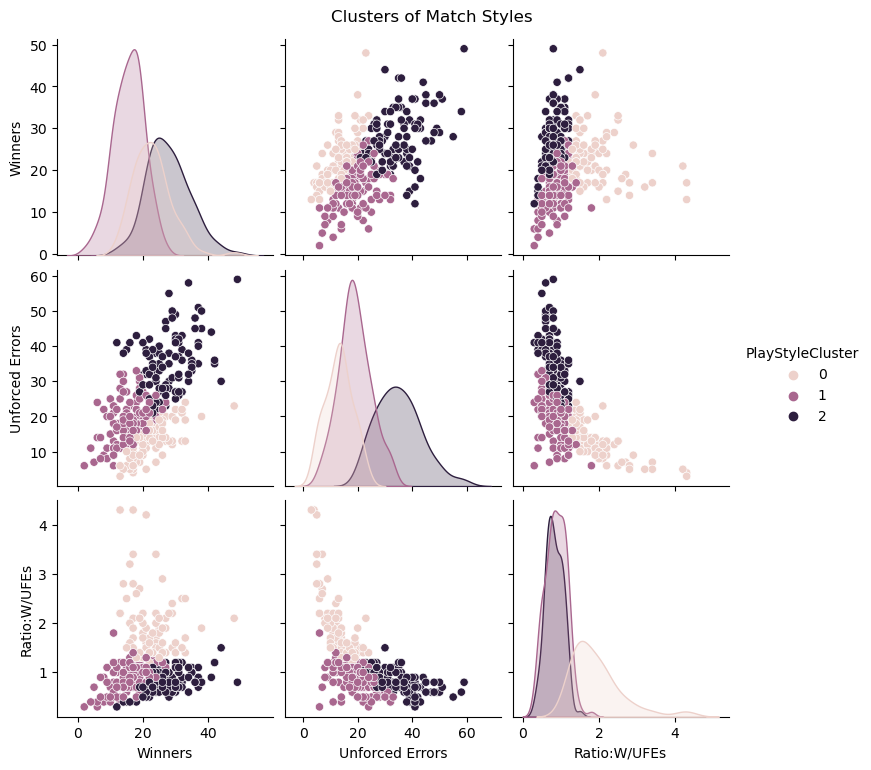

In [65]:
sns.pairplot(df, hue='PlayStyleCluster', vars=['Winners', 'Unforced Errors', 'Ratio:W/UFEs'])
plt.suptitle("Clusters of Match Styles", y=1.02)
plt.show()


In [66]:
pip install streamlit

                                              0.0/9.8 MB ? eta -:--:--
     -                                        0.4/9.8 MB 11.5 MB/s eta 0:00:01
     ---                                      0.9/9.8 MB 9.7 MB/s eta 0:00:01
     -----                                    1.5/9.8 MB 11.6 MB/s eta 0:00:01
     --------                                 2.0/9.8 MB 11.5 MB/s eta 0:00:01
     ---------                                2.4/9.8 MB 11.0 MB/s eta 0:00:01
     ----------                               2.7/9.8 MB 10.0 MB/s eta 0:00:01
     ------------                             3.1/9.8 MB 10.0 MB/s eta 0:00:01
     ---------------                          3.7/9.8 MB 10.2 MB/s eta 0:00:01
     -----------------                        4.2/9.8 MB 10.0 MB/s eta 0:00:01
     -------------------                      4.8/9.8 MB 10.5 MB/s eta 0:00:01
     ---------------------                    5.3/9.8 MB 10.3 MB/s eta 0:00:01
     -----------------------                  5.9/9.8 MB 10.4

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df['Outcome_Binary'] = df['Outcome'].map({'W': 1, 'L': 0})

features = ['Winners', 'Unforced Errors', 'Ratio:W/UFEs', 'WinnersPerPt', 'UFEsPerPt']
X = df[features]
y = df['Outcome_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(y) 

              precision    recall  f1-score   support

           0       0.40      0.22      0.29         9
           1       0.88      0.95      0.91        55

    accuracy                           0.84        64
   macro avg       0.64      0.58      0.60        64
weighted avg       0.81      0.84      0.82        64

0      1
1      1
2      1
3      0
4      0
      ..
315    1
316    1
317    1
318    1
319    0
Name: Outcome_Binary, Length: 320, dtype: int64


In [73]:
print(df.head())  # See a sample of the dataset
print(df.info())  # Check data types and missing values
print(df['Outcome'].value_counts())  # Check class distribution
print(df.isnull().sum())  # Check for missing values

                      Match  Winners  Unforced Errors  Ratio:W/UFEs  \
0       2018 Prague $80K QF       26               23           1.1   
1      2018 Budapest $60K F       32               13           2.5   
2   2019 Australian Open Q1       30               49           0.6   
3  2019 Australian Open R64       10               20           0.5   
4           2019 Fed Cup RR       15               27           0.6   

   WinnersPerPt  UFEsPerPt  RallyWinnersExcludingAces  RallyUFEsExcludingDFs  \
0         0.215      0.190                         25                     19   
1         0.288      0.117                         29                      9   
2         0.149      0.243                         27                     46   
3         0.104      0.208                          6                     14   
4         0.095      0.171                         11                     17   

   RallyRatio  RallyWinnersPerPointNoAceNoDFs  ...  vsRatioOfWToUFEs  \
0         1.3       

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Winners', 'Unforced Errors', 'Ratio:W/UFEs']  # Add more relevant features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target
features = ['Winners', 'Unforced Errors', 'Ratio:W/UFEs']  # Add more useful features
X = df[features]
y = df['Outcome'].map({'W': 1, 'L': 0})  # Convert Outcome to binary (Win = 1, Loss = 0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check performance
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 81.25%


In [76]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

ModuleNotFoundError: No module named 'xgboost'

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [78]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [79]:
best_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_model.fit(X_train, y_train)  # Train the model

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [80]:
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Retrained Model Accuracy: {accuracy * 100:.2f}%")

# Show detailed metrics
print(classification_report(y_test, y_pred_best))

Retrained Model Accuracy: 82.81%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      0.96      0.91        55

    accuracy                           0.83        64
   macro avg       0.43      0.48      0.45        64
weighted avg       0.73      0.83      0.78        64



In [88]:
import pandas as pd

# Get predictions for the test set
y_pred = best_model.predict(X_test)

# Convert to DataFrame for easy comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display some sample results
print(comparison_df.sample(10)) # Show 10 random samples
wrong_predictions = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print(len(comparison_df))
print("Misclassified Matches:")
print(wrong_predictions)

     Actual  Predicted
25        1          1
104       1          1
202       1          1
110       1          1
17        0          1
78        1          1
75        1          1
213       1          1
143       1          1
76        1          1
64
Misclassified Matches:
     Actual  Predicted
224       1          0
77        0          1
198       1          0
5         0          1
157       0          1
7         0          1
3         0          1
17        0          1
60        0          1
24        0          1
210       0          1


In [82]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 82.81%


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      0.96      0.91        55

    accuracy                           0.83        64
   macro avg       0.43      0.48      0.45        64
weighted avg       0.73      0.83      0.78        64



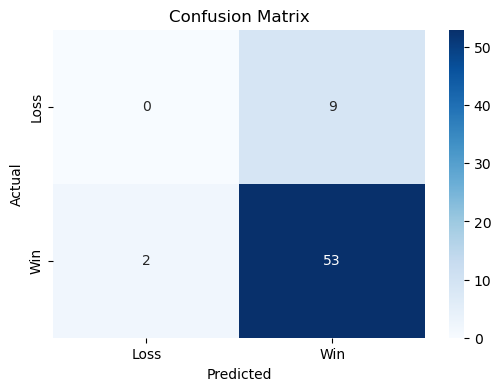

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Loss', 'Win'], yticklabels=['Loss', 'Win'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [86]:
wrong_predictions = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print(len(comparison_df))
print("Misclassified Matches:")
print(wrong_predictions)

64
Misclassified Matches:
     Actual  Predicted
224       1          0
77        0          1
198       1          0
5         0          1
157       0          1
7         0          1
3         0          1
17        0          1
60        0          1
24        0          1
210       0          1


In [87]:
# ... (your code)

# Find the line where comparison_df is created
# Example: comparison_df = pd.DataFrame({'Actual': actuals, 'Predicted': predictions})

print(f"Shape of comparison_df: {comparison_df.shape}") #add this line

wrong_predictions = comparison_df[comparison_df['Actual'] != comparison_df['Predicted']]
print("Misclassified Matches:")
print(wrong_predictions)

print(f"Length of comparison_df: {len(comparison_df)}")

#Add these lines, if you have actuals and predictions variables.
#print(f"Length of actuals: {len(actuals)}")
#print(f"Length of predictions: {len(predictions)}")

Shape of comparison_df: (64, 2)
Misclassified Matches:
     Actual  Predicted
224       1          0
77        0          1
198       1          0
5         0          1
157       0          1
7         0          1
3         0          1
17        0          1
60        0          1
24        0          1
210       0          1
Length of comparison_df: 64


In [89]:
import numpy as np

# Checking skewness
skew_values = df[['Winners', 'Unforced Errors', 'Ratio:W/UFEs', 'WinnersPerPt', 'UFEsPerPt']].skew()
print(skew_values)

# Apply log transformation to reduce skewness
df['Winners_log'] = np.log1p(df['Winners'])
df['UFEs_log'] = np.log1p(df['Unforced Errors'])
df['Ratio_log'] = np.log1p(df['Ratio:W/UFEs'])
df['WinnersPerPt_log'] = np.log1p(df['WinnersPerPt'])
df['UFEsPerPt_log'] = np.log1p(df['UFEsPerPt'])

Winners            0.525008
Unforced Errors    0.740826
Ratio:W/UFEs       2.020851
WinnersPerPt       0.530326
UFEsPerPt          0.157905
dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p

C:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



In [95]:
df['Winner_Dominance'] = df['Winners'] / (df['Winners'] + df['Unforced Errors'] + 1)
print(df['Winner_Dominance']) 
df['Rally_Dominance'] = df['RallyWinnersExcludingAces'] / (df['RallyWinnersExcludingAces'] + df['RallyUFEsExcludingDFs'] + 1)
print(df['Rally_Dominance']) 

0      0.362966
1      0.909035
2      0.246308
3      2.101442
4     -1.424973
         ...   
315    3.573269
316    1.699651
317    0.856205
318   -9.359171
319    0.225626
Name: Winner_Dominance, Length: 320, dtype: float64
0      0.555556
1      0.743590
2      0.364865
3      0.285714
4      0.379310
         ...   
315    0.500000
316    0.392857
317    0.550000
318    0.441176
319    0.407407
Name: Rally_Dominance, Length: 320, dtype: float64


In [96]:
df['Opponent_WinnerRatio'] = df['vsWinnersPerPt'] / (df['vsWinnersPerPt'] + df['vsUFEsPerPt'] + 1)
print(df['Opponent_WinnerRatio'])

0      0.099248
1      0.104814
2      0.076923
3      0.119816
4      0.135793
         ...   
315    0.051166
316    0.081744
317    0.082824
318    0.082888
319    0.135424
Name: Opponent_WinnerRatio, Length: 320, dtype: float64


In [97]:
df['Rally_Efficiency'] = df['RallyWinnersExcludingAces'] - df['RallyUFEsExcludingDFs']
df['FH_vs_BH'] = df['FHWPerPtNoAceNoDFs'] - df['BHWPerPointNoAceNoDFs']
print(df['Rally_Efficiency'])
print(df['FH_vs_BH'])

0       6
1      20
2     -19
3      -8
4      -6
       ..
315     1
316    -5
317     3
318    -3
319    -9
Name: Rally_Efficiency, Length: 320, dtype: int64
0      0.085
1      0.059
2      0.079
3     -0.013
4      0.054
       ...  
315   -0.026
316   -0.012
317    0.073
318    0.048
319    0.076
Name: FH_vs_BH, Length: 320, dtype: float64


In [98]:
df['HighRisk_Play'] = df['WinnersPerPt'] / (df['UFEsPerPt'] + 1)
print(df['HighRisk_Play'])

0      0.180672
1      0.257833
2      0.119871
3      0.086093
4      0.081127
         ...   
315    0.163283
316    0.109705
317    0.132799
318    0.120646
319    0.124686
Name: HighRisk_Play, Length: 320, dtype: float64
